In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import joblib
import shap
pd.set_option('display.max_columns', None)

# Load

In [2]:
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForestRegressor', 'LinearRegression'])

In [3]:
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
rf = loaded_joblib['RandomForestRegressor']
linreg = loaded_joblib['LinearRegression']

# Explain with Shap

In [4]:
shap.initjs()

In [5]:
len(X_train_df)

6392

In [32]:
# just 400 observations from our X_train_df and save it as X_shap
X_shap = shap.sample(X_train_df,nsamples=400,random_state=321)
X_shap.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_missing,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3888,15.85,0.110653,36.9506,2007.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2497,15.10,0.087407,221.8456,1997.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7723,17.50,0.015592,184.8266,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
8117,10.80,0.049820,243.2144,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7475,15.00,0.044999,140.4838,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [7]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap.head()

3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
Name: Item_Outlet_Sales, dtype: float64

In [8]:
#  Create a SHAP explainer using your fit model
explainer = shap.Explainer(rf)
explainer

In [9]:
%%time
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

CPU times: total: 1min 9s
Wall time: 1min 12s


shap._explanation.Explanation

In [10]:
X_shap.shape

(400, 37)

In [11]:
shap_values.shape

(400, 37)

In [12]:
shap_values[0]

.values =
array([ 2.96296946e-01, -4.43110406e+00, -1.68628389e+03,  4.35658759e+01,
        6.88894547e+00, -3.34304739e-01, -1.00922622e+00, -1.08642377e+00,
        9.20506027e-01,  1.80686494e+01, -2.80091105e+00, -1.56050878e+00,
       -5.78473262e+00,  5.75407805e-01, -4.70421194e-01, -4.40263713e-01,
       -1.20663917e+00, -1.52737382e+00, -2.72569528e+00, -3.54552452e-01,
       -3.94860320e-01,  6.21741706e+00, -1.73800879e+01,  1.52029431e+00,
       -5.41148926e+01, -1.86879759e+00,  4.85030038e+00,  1.69027368e+00,
       -6.23276579e-01, -1.83251257e+01,  4.53506791e+00, -5.89526420e+00,
        8.23166156e-01, -5.40821069e-01,  2.10160428e+02, -1.38448363e+01,
       -4.62601396e+01])

.base_values =
array([2211.93481346])

.data =
array([1.58500000e+01, 1.10653377e-01, 3.69506000e+01, 2.00700000e+03,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.0000

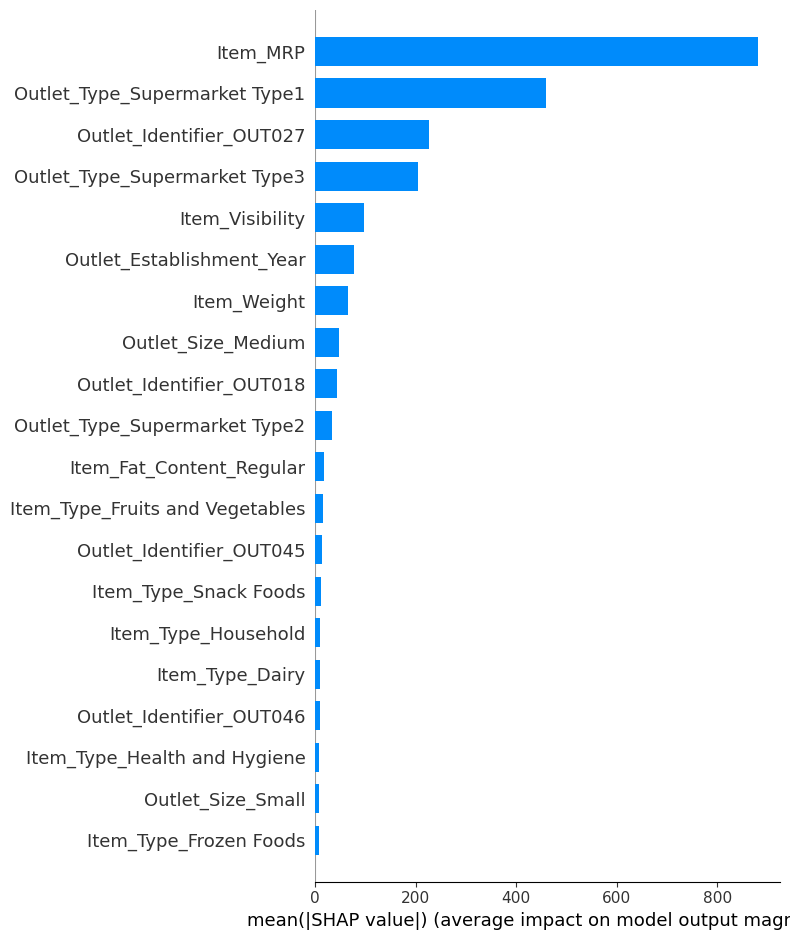

In [13]:
shap.summary_plot(shap_values,features= X_shap, plot_type='bar', show=False) # add show=False to prevent from show the plot and save beforehand
fig_gcf = plt.gcf()
fig_gcf.savefig('rf_shap_bar.png')

![](rf_top5.png)

4 of the top 5 Features are the same in both but are ranked differently. Item_MRP is the most important in both.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


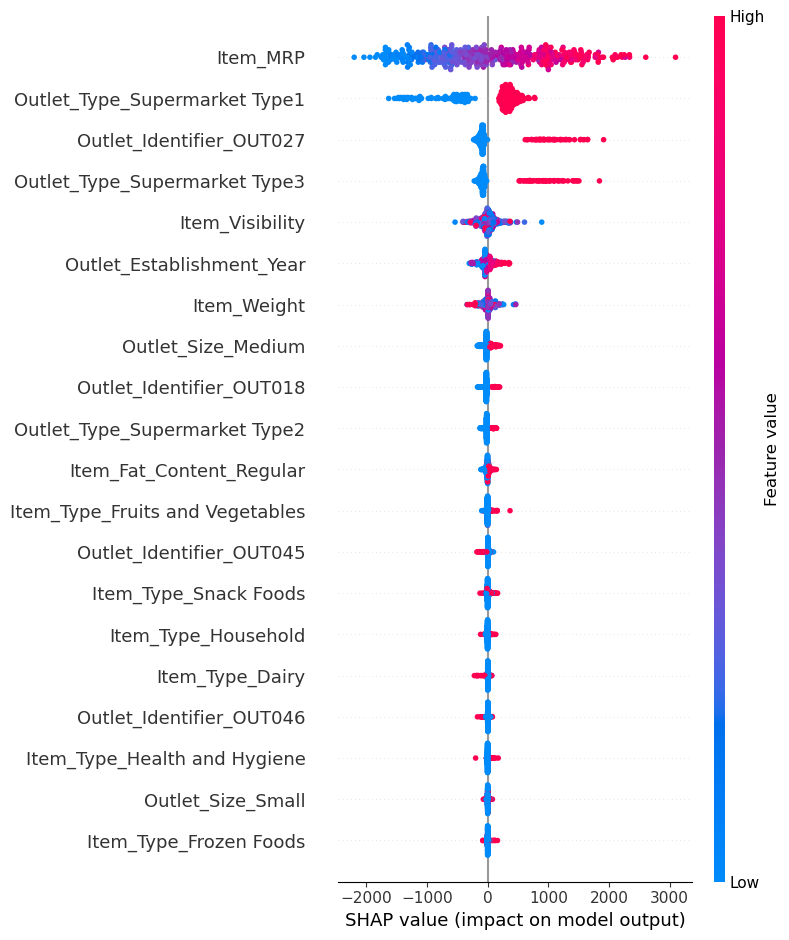

In [14]:
shap.summary_plot(shap_values,features= X_shap, show=False) # add show=False to prevent from show the plot and save beforehand
fig_gcf = plt.gcf()
fig_gcf.savefig('rf_shap_dot.png')

The top 3 most import features are:
- Item MRP
- Supermarket Type 1
- Outlet 27



A higher MRP lead to more sales and Items sold more in Type 1 and Outlet 27

# Local Explanations

In [21]:
len(X_shap)

400

In [15]:
X_shap_local = X_shap.reset_index(drop=True)
y_shap_local = y_shap.reset_index(drop=True)

In [20]:
## Getting the shap values wth the local X_shap 
shap_values = explainer(X_shap_local,y_shap_local)
#shap_vals_1 = shap_values[:,:,1]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


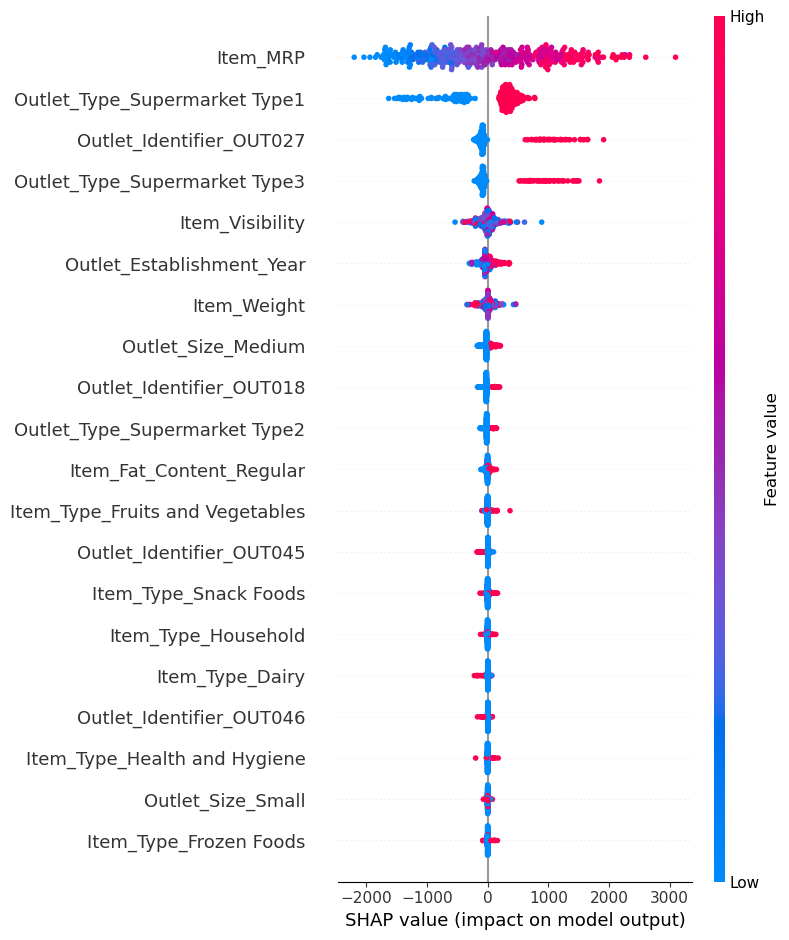

In [27]:
shap.summary_plot(shap_values,X_shap_local)

In [29]:
y_shap_local

0       759.0120
1       663.1368
2      2766.3990
3      1225.0720
4      1685.8056
         ...    
395    1379.5376
396    2956.1520
397    1259.6936
398    4206.5244
399     605.8780
Name: Item_Outlet_Sales, Length: 400, dtype: float64

In [41]:
X_shap_local

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_missing,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,15.850,0.110653,36.9506,2007.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,15.100,0.087407,221.8456,1997.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,17.500,0.015592,184.8266,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,10.800,0.049820,243.2144,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,15.000,0.044999,140.4838,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.850,0.033288,198.4768,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
396,8.895,0.088682,121.9730,2009.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
397,10.395,0.030282,116.3176,2009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
398,18.000,0.073607,156.6972,2007.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [87]:
for column in X_shap_local.columns:
    if column.startswith('Outlet_Identifier_OUT'):
        # Create the mask for the current column
        mask = X_shap_local[column] == True
        
        # Get the matching indices in y_shap
        matching_indices = y_shap.index[mask]
        
        # Calculate the sum of target values
        target_sum = y_shap.loc[matching_indices].sum()
        
        # Print the target sum
        print(column, target_sum)

Outlet_Identifier_OUT013 121890.00339999999
Outlet_Identifier_OUT017 145917.3938
Outlet_Identifier_OUT018 69864.39140000001
Outlet_Identifier_OUT019 9016.263599999998
Outlet_Identifier_OUT027 203003.0858
Outlet_Identifier_OUT035 91953.638
Outlet_Identifier_OUT045 83111.814
Outlet_Identifier_OUT046 111574.764
Outlet_Identifier_OUT049 111849.0736


In [88]:
# Get the indices of the column 'Outlet_Ientifier_OUT027'
column_indices = X_shap_local['Outlet_Identifier_OUT027'].index

# Select a random entry from the column
high_index = np.random.choice(column_indices)

print("Random Entry:",high_index)

Random Entry: 321


In [89]:
# Get the indices of the column 'Outlet_Ientifier_OUT027'
column_indices = X_shap_local['Outlet_Identifier_OUT019'].index

# Select a random entry from the column
low_index = np.random.choice(column_indices)

print("Random Entry:",low_index)

Random Entry: 64


In [90]:
high_item =  X_shap_local.loc[high_index]
high_item

Item_Weight                          18.75000
Item_Visibility                       0.02382
Item_MRP                             97.60420
Outlet_Establishment_Year          1987.00000
Item_Fat_Content_Regular              0.00000
Item_Type_Breads                      0.00000
Item_Type_Breakfast                   0.00000
Item_Type_Canned                      0.00000
Item_Type_Dairy                       1.00000
Item_Type_Frozen Foods                0.00000
Item_Type_Fruits and Vegetables       0.00000
Item_Type_Hard Drinks                 0.00000
Item_Type_Health and Hygiene          0.00000
Item_Type_Household                   0.00000
Item_Type_Meat                        0.00000
Item_Type_Others                      0.00000
Item_Type_Seafood                     0.00000
Item_Type_Snack Foods                 0.00000
Item_Type_Soft Drinks                 0.00000
Item_Type_Starchy Foods               0.00000
Outlet_Identifier_OUT013              1.00000
Outlet_Identifier_OUT017          

In [91]:
y_shap_local[high_index]

1488.063

In [92]:
low_item =  X_shap_local.loc[low_index]
low_item

Item_Weight                           7.905000
Item_Visibility                       0.010012
Item_MRP                            250.440800
Outlet_Establishment_Year          1997.000000
Item_Fat_Content_Regular              0.000000
Item_Type_Breads                      0.000000
Item_Type_Breakfast                   0.000000
Item_Type_Canned                      0.000000
Item_Type_Dairy                       0.000000
Item_Type_Frozen Foods                0.000000
Item_Type_Fruits and Vegetables       0.000000
Item_Type_Hard Drinks                 0.000000
Item_Type_Health and Hygiene          0.000000
Item_Type_Household                   0.000000
Item_Type_Meat                        0.000000
Item_Type_Others                      0.000000
Item_Type_Seafood                     0.000000
Item_Type_Snack Foods                 1.000000
Item_Type_Soft Drinks                 0.000000
Item_Type_Starchy Foods               0.000000
Outlet_Identifier_OUT013              0.000000
Outlet_Identi

In [93]:
y_shap_local[low_index]

3004.0896

In [94]:
shap.force_plot(explainer.expected_value[0],
                shap_values=shap_values[low_index].values,
               features=X_shap_local.iloc[low_index])

In [95]:
shap.force_plot(explainer.expected_value[0],
                shap_values=shap_values[high_index].values,
               features=X_shap_local.iloc[high_index])